In [1]:
import pandas as pd
import time
import seaborn as sns
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from wordcloud import WordCloud
import string
import numpy as np
from collections import Counter

# 1. Load Data

In [2]:
df = pd.read_csv('cleaned_reviews.csv')

In [3]:
df.head()

,rating,reviews,rating_value,clean_reviews
0,Rating 1 out of 5,This is the most difficult review I’ve ever wr...,1,This is the most difficult review Ive ever wri...
1,Rating 5 out of 5,I really enjoyed this on audio!! Over 15 hours...,5,I really enjoyed this on audio Over 15 hours i...
2,Rating 3 out of 5,3.5 ⭐⭐⭐ I listened to Prince Harry reading thi...,3,35 I listened to Prince Harry reading this on...
3,Rating 3 out of 5,My curiosity got the better of me and I read P...,3,My curiosity got the better of me and I read P...
4,Rating 3 out of 5,"So, I have always “liked” Harry. This memoir m...",3,So I have always liked Harry This memoir made ...


# 2. Visualisations 

In [4]:
grouped = df.groupby('rating_value')['clean_reviews'].apply(lambda x: ' '.join(x))

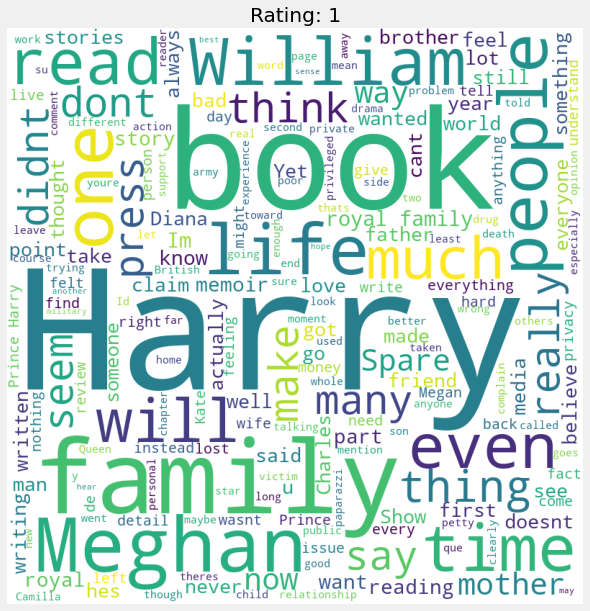

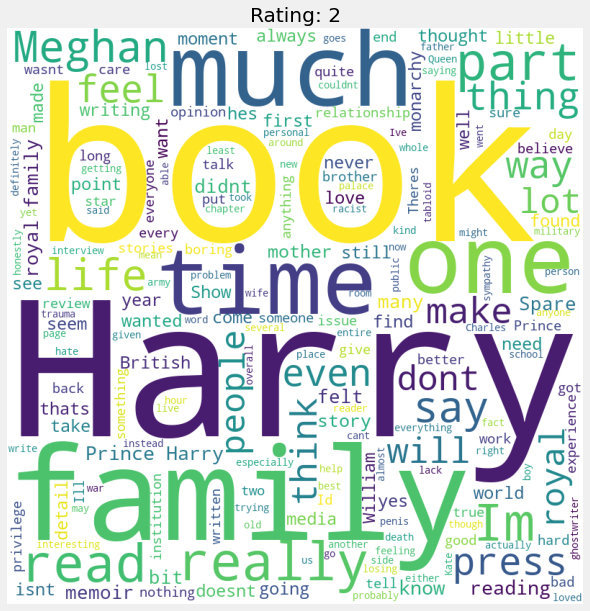

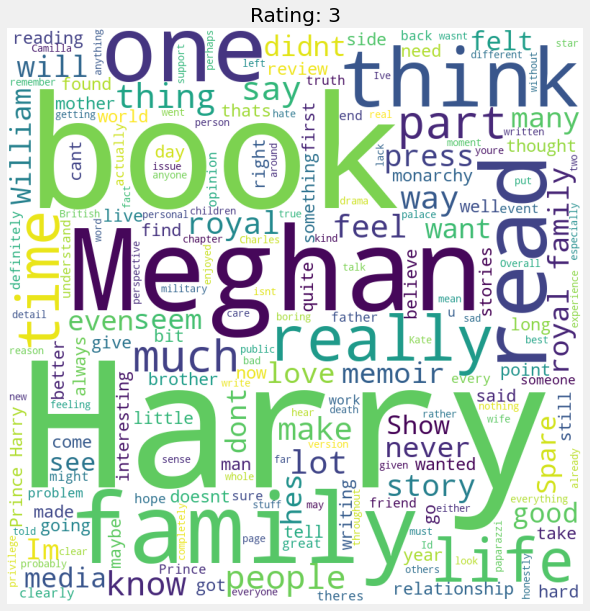

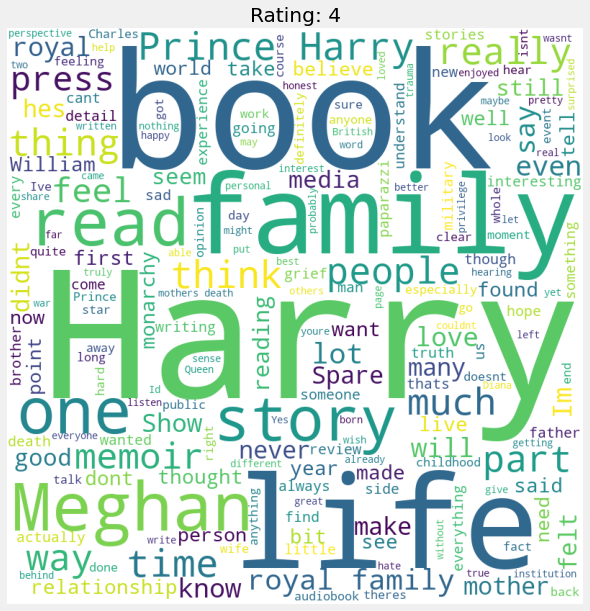

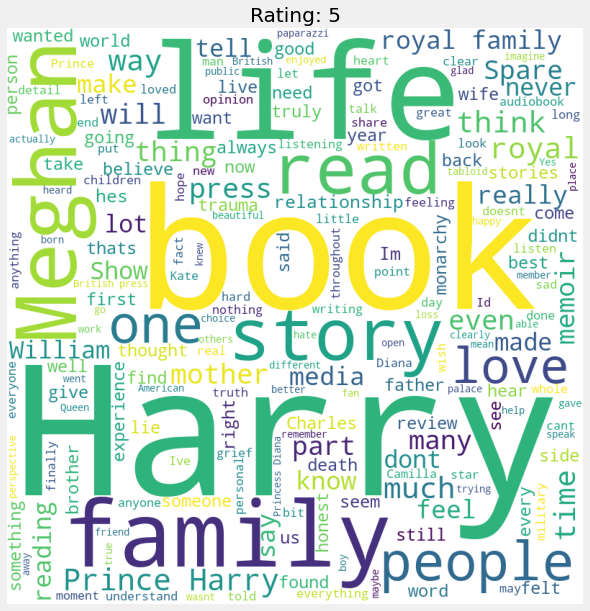

In [5]:
for rating, text in grouped.items():
    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          min_font_size=10).generate(text)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title('Rating: ' + str(rating))
    plt.show()

In [6]:
# after removing expected words

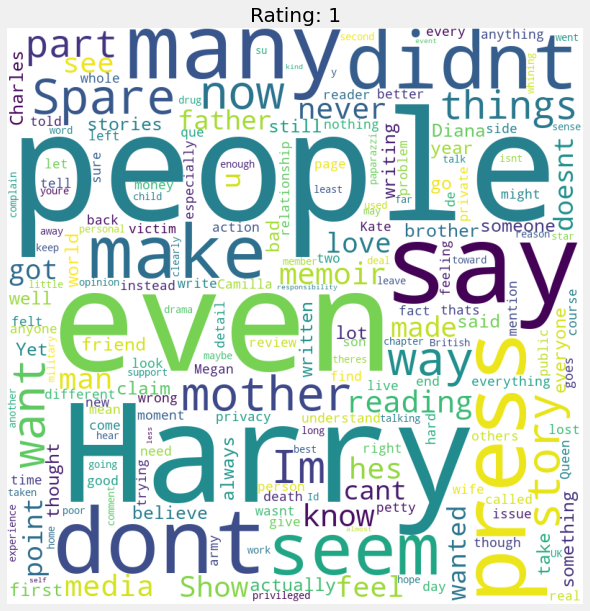

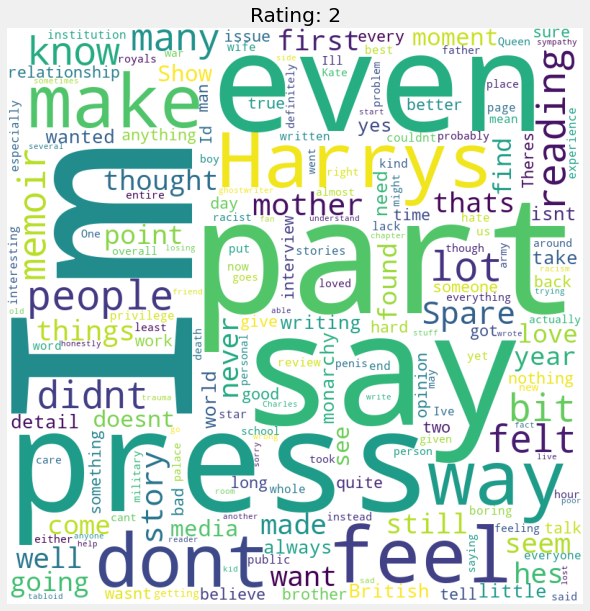

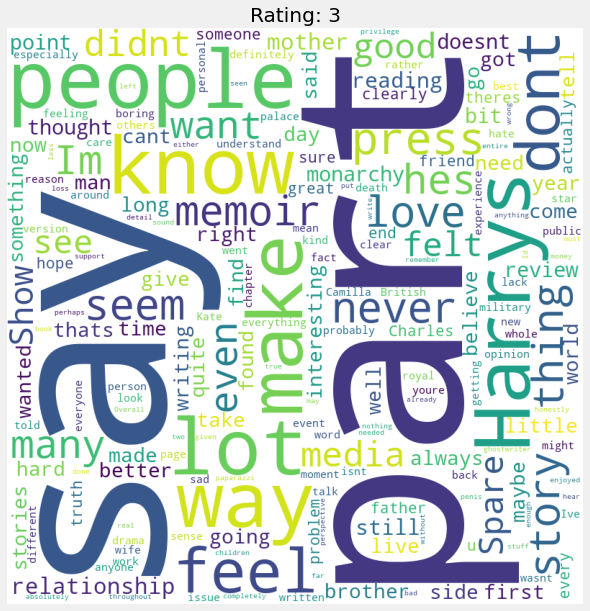

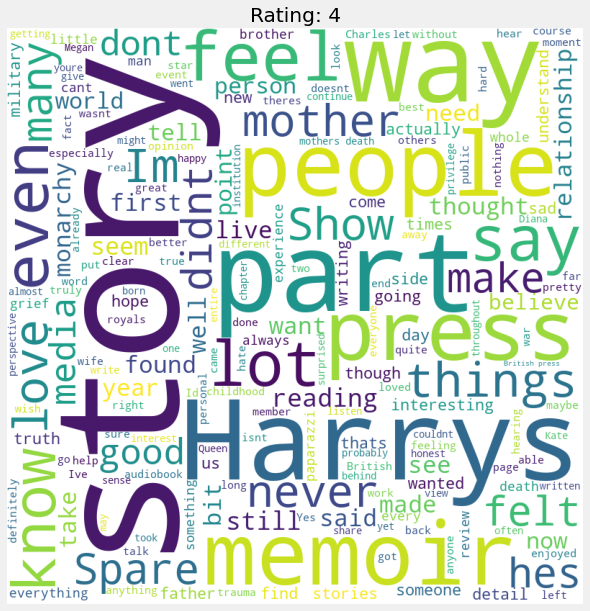

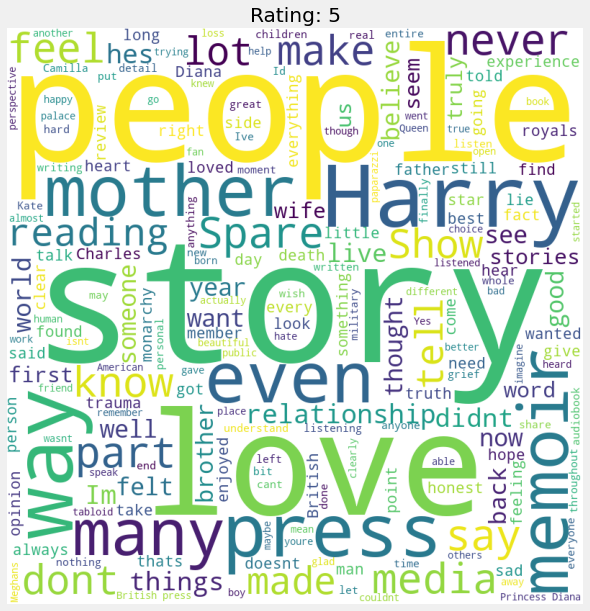

In [11]:
#word clouds after removing key words
# Define the key words that you want to remove from the text
key_words = ['harry', 'meghan', 'william', 'time','think','life','much','really','read','book', 'Harry', 'Meghan', 'William', 'Prince', 'prince', 'will', 'one', 'thing','family','Family', 'Royal','royal']


# Remove the key words from the 'clean_reviews' column in the DataFrame
df['extracted_reviews'] = df['clean_reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in key_words]))

# Group the DataFrame by 'rating_value' and join the 'clean_reviews' column into a single string
grouped_extracted = df.groupby('rating_value')['extracted_reviews'].apply(lambda x: ' '.join(x))

# Create a Counter object to count the frequency of each word in the grouped text
word_counts = Counter(' '.join(grouped_extracted.values.tolist()).split())

for rating, text in grouped_extracted.items():
    wordcloud_new = WordCloud(width=800, height=800,
                          background_color='white',
                          min_font_size=10).generate(text)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud_new)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title('Rating: ' + str(rating))
    plt.show()